https://jason-chen-1992.weebly.com/home/-google-colab-yolov41303994

# check GPU information

In [1]:
!/usr/local/cuda/bin/nvcc --version
!nvidia-smi

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
Wed Nov 24 23:46:25 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |            

# 測試
測試之前安裝的darknet能不能正常使用

In [2]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [3]:
import os
!ln -s '/content/gdrive/MyDrive/space_Colab' /work1

In [4]:
# Copy the darknet from Google Drive to Google Colab VM
!cp /work1/space_for_YOLO/darknet.zip /content/darknet.zip
# Unzip the darknet file
!unzip /content/darknet.zip
# go into darknet folder
%cd darknet

Archive:  /content/darknet.zip
   creating: darknet/
  inflating: darknet/CMakeLists.txt  
   creating: darknet/results/
 extracting: darknet/results/tmp.txt  
  inflating: darknet/DarknetConfig.cmake.in  
  inflating: darknet/darknet_video.py  
  inflating: darknet/darknet         
  inflating: darknet/net_cam_v4.sh   
  inflating: darknet/testtest.jpg    
   creating: darknet/src/
  inflating: darknet/src/sam_layer.h  
  inflating: darknet/src/yolo.c      
  inflating: darknet/src/detector.c  
  inflating: darknet/src/cost_layer.c  
  inflating: darknet/src/classifier.c  
  inflating: darknet/src/box.c       
  inflating: darknet/src/softmax_layer.c  
  inflating: darknet/src/layer.h     
  inflating: darknet/src/avgpool_layer.c  
  inflating: darknet/src/col2im.h    
  inflating: darknet/src/crnn_layer.c  
  inflating: darknet/src/getopt.h    
  inflating: darknet/src/yolo_console_dll.cpp  
  inflating: darknet/src/route_layer.c  
  inflating: darknet/src/col2im.c    
  inflating: d

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF


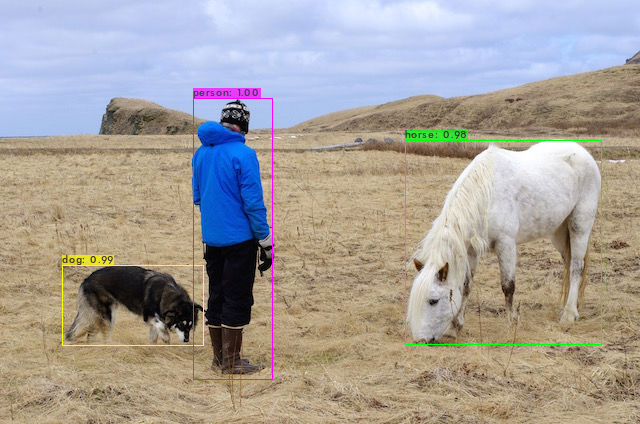

In [5]:
!./darknet detect cfg/yolov4.cfg yolov4.weights data/person.jpg
# show result
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread('predictions.jpg')
cv2_imshow(image)

# 開始訓練

In [6]:
try:
  import os
  os.mkdir('/work1/svhn_HW2/weights/')
except FileExistsError:
  print("Direction is exist !!!")

Direction is exist !!!


In [ ]:
FIRST_TIME = False
if FIRST_TIME:
  !./darknet detector train /work1/svhn_HW2/obj.data /work1/svhn_HW2/yolov4_1124.cfg yolov4.conv.137  -dont_show-map -chart chart.png -dont_show 
else:
  !./darknet detector train /work1/svhn_HW2/obj.data /work1/svhn_HW2/yolov4_1124.cfg /work1/svhn_HW2/weights/yolov4_1124_last.weights -chart chart.png -dont_show 

串流輸出內容已截斷至最後 5000 行。
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.751807), count: 10, class_loss = 0.268473, iou_loss = 0.338109, total_loss = 0.606582 
 total_bbox = 3167196, rewritten_bbox = 0.046161 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.829961), count: 4, class_loss = 0.310674, iou_loss = 4.830041, total_loss = 5.140716 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.751457), count: 10, class_loss = 1.404908, iou_loss = 2.393801, total_loss = 3.798709 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.798061), count: 12, class_loss = 0.996474, iou_loss = 1.049350, total_loss = 2.045824 
 total_bbox = 3167222, rewritten_bbox = 0.046160 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.000000), count: 1, class_loss = 0.000001, iou_loss = 0.000000, total_loss = 0.000001 
v3 (iou loss, Normalizer: (